In [1]:
# Author: Ciarán O'Brien
# Lecture: Jane Courtney
# Submitted: 15/11/18
# This code is in response to Assignment 2: Where's Wally
# N.B. This code orignated as a Jupyter file, thus relavent code and lineNumbers remain 

# Boiler plate imports 
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import easygui
import imutils
import math
import operator
from PIL import Image
from PIL import ImageDraw

# Setup

The goal of the task was to find Wally, or Waldo as the American's call him ? The requirements state, where possible, we only make use of built in python and openCV libraries, and that we provide our own novel approach. 

# Method:

My method included 4 steps:

1. Masking
2. Blob Detection (That's the actual name of the fxn, not mine!)
3. Blob filtering 
4. Blob Mask distance correlation

## 1. Masking:

Wally is uniquely defined as the following:
Red & White Stripe Top, Blue Bottoms, and Glasses 

In order to find each of these unique features, I moved the image to HSV, in order to controll the range of colours I'm capturing. I created a Red and White mask in order to capture the red and white stripes of Wally's top and Hat.

The resulting mask image form this doesn't really help the view in the slightess to find Wally. With every image from his books, there are simply too much colour noise on the page. Separating the two masks doesn't help either, as each colour mask still had too much noise.

## 2. Blob Detection

As I said before, this isn't my silly function name. OpenCV contains a module called simpleBlobDetector(). The FXN requires a params object to create the detector, if none are provided a default set of parameters are passed. 
Params include:

float thresholdStep;
float minThreshold;
float maxThreshold;
size_t minRepeatability;
float minDistBetweenBlobs;

These first set of parameters are a set of preprocessing to detect the blobs, including thresholding, and then limiters for detected blobs which follow below.

bool filterByColor;
uchar blobColor; # If prevous is true, this parameter filters blolbs of brightness from 0 -> 255

bool filterByArea;
float minArea, maxArea;# If prevous is true, this parameter filters blolbs of a max&min calculated area

bool filterByCircularity;
float minCircularity, maxCircularity; # If prevous is true, this parameter filters blolbs of a max&min calculated circumference

bool filterByInertia;
float minInertiaRatio, maxInertiaRatio; # If prevous is true, this parameter filters blolbs of a max&min calculated ratio of inertia. A low ratio results in an elongated filtering, like pulled play dough. And a high ratio  results in a very compact/circular filtering.

bool filterByConvexity;
float minConvexity, maxConvexity;  # If prevous is true, this parameter filters blolbs of a max&min calculated ratio of convexity, 0-1. Low ratio leads to a concave filtering, and oppositely a high ratio leads to a convex filtering.

## 3. Blob filtering 

Now once I have all the detected bobs, I needed to calculate the distance between each blob centroid, more on this next. In order to filter out unwanted blobs, I figured out boundaries to separate the wanted and unwanted centroids of the blobs. This allowed me to filter out, and only keep the necessary groupings of blobs.

## 4. Blob Mask distance correlation
As mentioned previously, I needed to calculate the distance between the centroids of the blobs. My reasoning is, if the centroids are overlapping, the two centroids are of the red and white stripes for Wally’s shirt. This was done again with the Euclid distance algorithm.

### Alternatives
Like any problem, there are numerous methods to solve it. I’ll explore some of those here;

#### Feature Matching- Stripes

As part of OpenCV, there is a function called featureMatch(). I did some tests, and initial work on this fxn to see if it’ll prove successful. To do this, I created a simple image made of red and white stripes. This would be the feature that I’d be looking to match in the Wally image. How this fxn works is by using a sliding window technique, using the feature to match, my created red and white stripe image, and comparing a kernel sized window against the Wally image. From this comparison results a feature map image is created. 

cv2.matchTemplate(
img, # src image
matching, # Feautre image to match
method) # Sliding image feature matching method

#### Feaure Matching - Glasses

Another feature that is often uniquely attributed to Wally, are his glasses. As part of OpenCV, there is a fxn called HoughCicles(). This is quite powerfull for detecting all circles, or part of circles, within an image.
circles = cv2.HoughCircles(img, #src Image
cv2.HOUGH_GRADIENT, # Hough Circling Method
1, # DP
30, # Minimum distance between centroids
param1=140, # Canny Edge Detection Thresholding
param2=40, # Accumulator threshold for the circle centers. Lower means more false positives
minRadius=0, # Minimum radius allowed for a detected Circle
maxRadius=50) # Maximum radius allowed for a detected Circle

#### Neural Net

Although outside the scope of the course, using a neural network may easily find Wally. To do this, we could use a NN model pretrained on detecting faces, then using transfer learning, re-train it on sample images of Wally. This is the most sure-fire way to find him in every situation.

# Testing

## Image testing:

There has only been one test image used, and that is the image provided. Using the set of 4K images found here: https://imgur.com/gallery/b8btr
Yields various results, thus my method is not robust enough to use out in the wild.

## Error Testing:

Through the code, the relavent error checking has occured along with the relavent Errors Raised though Python's Exception class. This errors raised offer the user with the relavent information as to what they need to do to fix the error. Each of these errors are only raised in the worse case scenario, that is unobtainable in this controlled example of my solution.

## Unit Testing:

As part of Python Library, there is a Unit Testing framework available. I used this framwork to ensure the correct errors are bein rasied from the last section.

# Evaluation
This was quite a difficult task, maybe not best suited for pure image processing, but interesting none the less. Although other solutions exist, using pure image processing provided with a fun, but interesting challenge to tackle this assignment. My solution includes a method suitable for the image provided, along with 50% test coverage. 

If I were to repeat the task again, I would like to explore the option of building a neural network, as I believe this would yield the best results. Of course, there will still be a certain amount of image pre-processing envoled. 


In [2]:
# System enviroment flag used throughout the program
os.environ['Flag'] = ''

In [3]:
# Loading in the sample image of Where's Wally
def getColourWally():
    return plt.imread('wally.jpg')

#### Converting the Colour image into the HSV range

The HSV range is more usefull than RGB, as it allows for capturing colours of diffrent Brightness and Saturation
THe colour of wally shouldn't varry too much, but HSV allows us to target a range of colours to find him

In [4]:
def getHSVWally():
    return cv2.cvtColor(getColourWally(), cv2.COLOR_BGR2HSV)

In [5]:
# Converting the colour image into greyscale for the fun too !
def getGreyWally(colourWally):
    return cv2.cvtColor(getColourWally(),cv2.COLOR_RGB2GRAY)

#### Red Mask
low_red = np.array([115,170,100])

high_red = np.array([180,255,180])


Here is were we define the range of values needed to capture the red stripes of Wally.
A mask is created using the upper and lower values for red


In [6]:
def getRedMask(wally,hsvWally):
    low_red = np.array([100,150,100])
    high_red = np.array([180,255,180])
    red_masking = cv2.inRange(hsvWally,low_red,high_red)
    return cv2.bitwise_and(wally,wally,mask = red_masking)
    #plt.imsave("Masks/simpleRedMask.jpg",red_res)

In [7]:
# Here is were we define the range of values needed to capture the white stripes of Wally
# A mask is created using the upper and lower values for white
def getWhiteMask(wally,hsvWally):
    low_white = np.array([0,0,100])
    high_white = np.array([255,40,255])
    white_masking = cv2.inRange(hsvWally,low_white,high_white)
    return cv2.bitwise_and(wally,wally,mask = white_masking)

In [8]:
def wallyBlobDetect(img):

    greyImage = None
#     try:
#         greyImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     except Exception as error:
#         print(error)
    try: 
        if(len(img.shape)<3):
            greyImage = img
        elif(len(img.shape) == 3):
            greyImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            raise Exception("Unsupported mask passed")
    except Exception as error:
        print("An error has occured\n",error)
        
    if(os.environ['Flag'] == "Red"):
        # Detection Red
        params = cv2.SimpleBlobDetector_Params()
        params.filterByArea= True
        params.filterByCircularity = False
        params.filterByColor = False
        params.filterByConvexity = False
        params.filterByInertia  = False
        params.minArea = 1
        params.maxArea = 1.5
    
    elif(os.environ['Flag'] == "White"):
        # Detection White
        params = cv2.SimpleBlobDetector_Params()
        params.filterByArea= True
        params.filterByCircularity = False # Has no positive effect on detection 
        params.filterByColor = False # Drastic effect on reducing flase +tives, blobColour Param has no inbteween
        params.filterByConvexity = False # Has too much positive effect on deteciton 
        params.filterByInertia  = True # Has positive -20 hits
        params.minInertiaRatio = 0
        params.maxInertiaRatio = 100
        params.minArea = 1
        params.maxArea = 1.1
    
    else:
        raise ValueError('There must be a red or white colour flag')
    
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(greyImage)
    
    coords = []
    for i in keypoints:
        x=i.pt[0]; y=i.pt[1]
        coords.append([x,y])

    white = []

    # Combo Detection
    blobs = coords + white

    return [coords,white,blobs]

In [9]:
def removeGroupingBlobs(blobs):    
    if (os.environ['Flag'] == "White"):
        major = 45
        minor = 40
    elif(os.environ['Flag'] == "Red"):
        major = 370
        minor = 350
    else:
        raise ValueError('There must be a red or white colour flag')
    separatedPoints = []
    for index,point in enumerate(blobs):
        x1 = point[1]
        y1 = point[0]
        x2 = blobs[(index+1) % len(blobs)][1]
        y2 = blobs[(index+1) % len(blobs)][0]
        distannce = math.hypot(x2 - x1, y2 - y1)
        if (distannce < major and distannce > minor):
            #print("Points are too close")
            separatedPoints.append([x1,y1])
    return separatedPoints

In [10]:
def displayBlobCoords(mask,Blobs):
    fileName = ""
    fileLocation = "Blobs/"
    if (os.environ['Flag'] == "Red"):
        fileName = "wallyRedBlobTest.jpg"
        imgCopy = mask.copy()
    elif(os.environ['Flag'] == "White"):
        fileName = "wallyWhiteBlobTest.jpg"
        imgCopy = mask.copy()
    else:
        raise ValueError('There must be a red or white colour flag')
    
    for coords in Blobs:
        w = 5
        h = 5
        x = int(round(coords[1]))
        y = int(round(coords[0]))
        cv2.rectangle(imgCopy, (x-w, y-h), (x+w, y+h), (255, 0, 255), 2)
        #cv2.rectangle(copy, (coords[1][0]-10, coords[1][1]-10), int(round(10)), int(round(10)), (100, 100, 100), 2)
        #cv2.rectangle(img, (int(round(coords[1][0])- 10), int(round(coords[1][1]) - 10)), 10, 10, (100, 100, 100), 2)  

In [11]:
def findDistanceCorilation(blobs):  # blobbies[1][0][1]
    #print(blobs[1])
    minimumDistance = 999
    FTWCoords = []
    for redBlobs in blobs[0]:
        for whiteBlobs in blobs[1]:
            x1 = redBlobs[1]
            y1 = redBlobs[0]
            x2 = whiteBlobs[1]
            y2 = whiteBlobs[0]
            distance = math.hypot(x2 - x1, y2 - y1)
            if(distance < minimumDistance):
                minimumDistance = distance
                FTWCoords = [[x1,y1],[x2,y2]]
    imgCopy = getColourWally().copy()
    x1 = int(round(FTWCoords[0][0]))
    y1 = int(round(FTWCoords[0][1]))
    x2 = int(round(FTWCoords[1][0]))
    y2 = int(round(FTWCoords[1][1]))
    x = int(round((x1+x2)/2))
    y = int(round((y1+y2)/2))
    h = 30
    w = 30
    cv2.rectangle(imgCopy, (x-w,y-h), (x+w, y+h), (255, 0, 255), 5)
    crop_img = imgCopy[y-h:y+h, x-w:x+w]
    crop_img = cv2.resize(crop_img, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
    
    plt.imsave("cropped.jpg",crop_img)
    return imgCopy

In [12]:
os.environ['Flag'] = 'White'
white_places = wallyBlobDetect(getWhiteMask( getColourWally(), getHSVWally() ))
newRedBlobs = removeGroupingBlobs(white_places[2])
displayBlobCoords(getWhiteMask( getColourWally(), getHSVWally() ),newRedBlobs)

In [13]:
os.environ['Flag'] = 'Red'
red_places = wallyBlobDetect(getRedMask(getColourWally(),getHSVWally()))
newWhiteBlobs = removeGroupingBlobs(red_places[2])
displayBlobCoords(getRedMask(getColourWally(),getHSVWally()),newWhiteBlobs)

In [14]:
wallyFound = findDistanceCorilation([newWhiteBlobs,newRedBlobs])

In [15]:
plt.imsave("FTW.jpg",wallyFound)

In [16]:

import unittest

class TestNotebook(unittest.TestCase):

    def test_greyImageReturned(self):
        self.assertEqual(2,len(getGreyWally(getColourWally()).shape))
        
    def test_colourImageRetuned(self):
        self.assertEqual(3,len(getColourWally().shape))
        
    def test_missingFlag(self):
        os.environ['Flag'] = ''
        testArray = [1,2,3]
        mask = []
        try:
            output = displayBlobCoords(mask,testArray)
        except ValueError:
            pass
        
    def test_displayBlobCoords_incorectFlag(self):
        os.environ['Flag'] = 'Blue'
        testArray = [1,2,3]
        mask = []
        try:
            output = displayBlobCoords(mask,testArray)
        except ValueError:
            pass
        
    



unittest.main(argv=[''], verbosity=2, exit=False)

test_colourImageRetuned (__main__.TestNotebook) ... ok
test_displayBlobCoords_incorectFlag (__main__.TestNotebook) ... ok
test_greyImageReturned (__main__.TestNotebook) ... ok
test_missingFlag (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.172s

OK


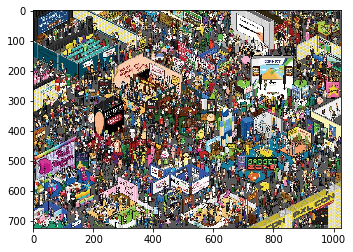

In [23]:
plt.imshow(cv2.cvtColor(cv2.imread("wally.jpg"), cv2.COLOR_BGR2RGB))

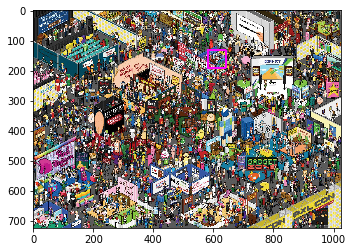

In [18]:
plt.imshow(wallyFound)

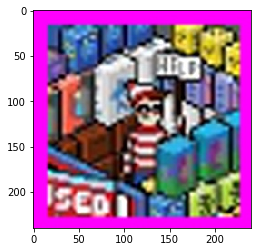

In [26]:
plt.imshow(cv2.cvtColor(cv2.imread("cropped.jpg"), cv2.COLOR_BGR2RGB))